<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN With NHL Data

_Authors: Joseph Nelson (DC)_

---

Below you'll practice KNN classification on a data set of National Hockey League statistics.

You'll be predicting the `Rank` of a team using predictor variables of your choice.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Web location:
#web_csv = 'https://raw.githubusercontent.com/josephofiowa/GA-DSI/master/NHL_Data_GA.csv'
local_csv = './datasets/NHL_Data_GA.csv'

### 1) Load the NHL data.

In [19]:
# A:
nhl = pd.read_csv(local_csv)
nhl.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


In [20]:
#striping year from team to then place it into its own columns 'year'
nhl['year'] = nhl.Team.str.extract('(\d+)').astype(int)


/Users/slevin886/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [21]:
#stripping team of year characters 
nhl['Team'] = nhl.Team.str[:-2]
nhl.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM,year
0,Washington,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269,10
1,Vancouver,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985,11
2,San Jose,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195,10
3,Chicago,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966,10
4,Vancouver,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049,12


In [23]:
#Turning time on ice into an integer (assuming this is hours/minutes- placing each to last hour)
nhl['TOI'] = nhl['TOI'].str[0:4].astype(int)
nhl.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM,year
0,Washington,121,1,2001,115,73,3.45,2.19,61.2,1112,...,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269,10
1,Vancouver,117,1,2056,94,72,2.74,2.10,56.6,1143,...,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985,11
2,San Jose,113,1,1929,90,68,2.80,2.11,57.0,1065,...,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195,10
3,Chicago,112,1,2020,104,83,3.09,2.46,55.6,1186,...,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966,10
4,Vancouver,111,1,2052,86,74,2.51,2.16,53.8,1078,...,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049,12


You can use the Legend on [www.nhl.com](http://www.nhl.com/stats/team?aggregate=0&gameType=3&report=teamsummary&reportType=season&seasonFrom=20162017&seasonTo=20162017&filter=gamesPlayed,gte,1&sort=points,wins) as a data dictionary reference.

Features that have a '60' in them are features that have been adjusted to represent averages over 60 minutes of game time.  
> A GF60 of 3.45 would indicate that the team averaged 3.45 goals per sixty minutes of Time on Ice (one regulation game).

### 2. Perform any required data cleaning. Do some EDA.

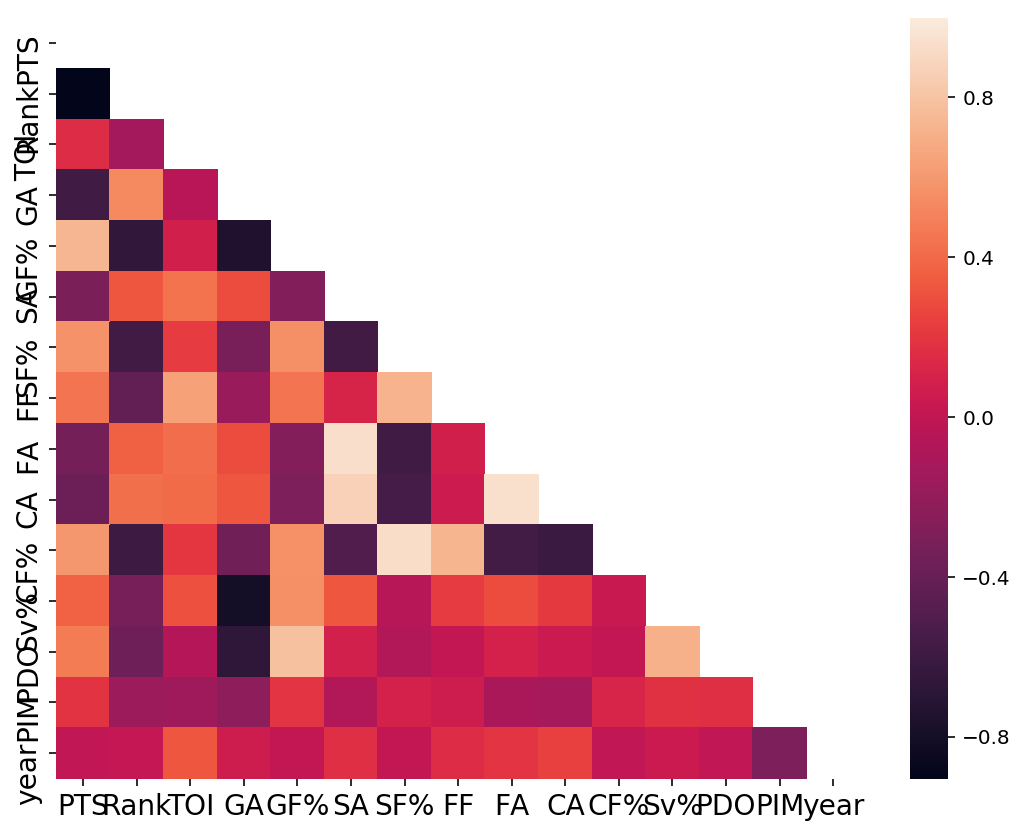

In [37]:
# A:
#for the sake of this, I am getting rid of per game regularize (would have to get rid of one or the other)
nhl = nhl[[c for c in nhl.columns if '60' not in c]]

#drop Sh% because is same as SF%
#nhl = nhl.drop(['FF%','CF', 'SF', 'GF'], axis=1)

mean_corr = nhl.corr()
fig, ax = plt.subplots(figsize=(9,7))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(mean_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(mean_corr, mask=mask, ax=ax)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

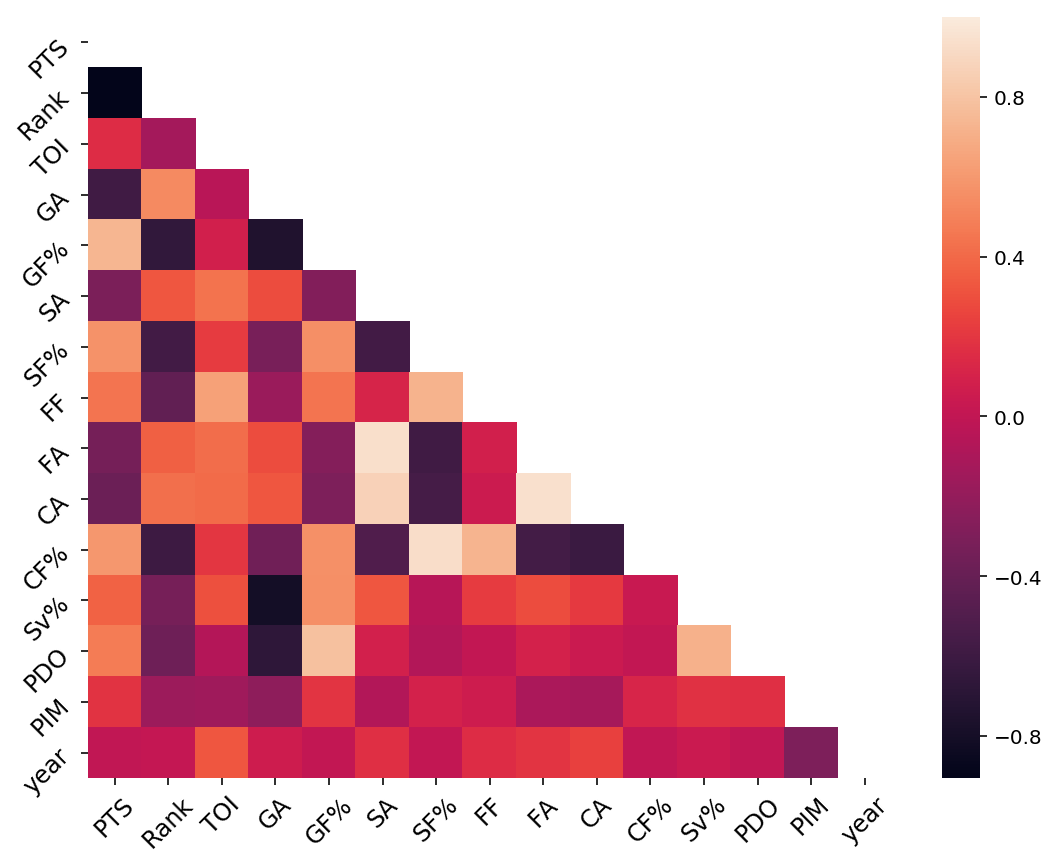

In [42]:
# A:
#for the sake of this, I am getting rid of per game regularize (would have to get rid of one or the other)
nhl = nhl[[c for c in nhl.columns if '60' not in c]]

#drop Sh% because is same as SF%, same for others here.
#nhl = nhl.drop(['FF%','CF', 'SF', 'GF'], axis=1)

mean_corr = nhl.corr()
fig, ax = plt.subplots(figsize=(9,7))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(mean_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(mean_corr, mask=mask, ax=ax)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=45)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

### 3) Set up the `Rank` variable as your target. How many classes are there?

In [43]:
# A: Three classes
y = nhl['Rank'].values
y.value_counts()

3    31
2    30
1    29
Name: Rank, dtype: int64

### 4) What's the baseline accuracy?

In [45]:
# A: approximately 34% if you guessed 3 everytime (the most likely value)

0.34444444444444444

### 5) Choose four features as your predictor variables and set up your design matrix.

In [47]:
# A:
X = nhl[['GF%', 'FF', 'PTS', 'PDO']]

### 6) Fit a `KNeighborsClassifier` with one neighbor using the target and predictors.

In [57]:
# A:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [50]:
ss = StandardScaler()
Xs = ss.fit_transform(X)


In [75]:
knn5 = KNeighborsClassifier(n_neighbors=1, weights='uniform')
scores = cross_val_score(knn5, Xs, y, cv=2)
np.mean(scores), np.std(scores)
model = knn5.fit(Xs, y)
score = model.score(Xs, y)

1.0

### 7) Evaluate the accuracy of your model.
- Is it better than the baseline?
- Is it legitimate?

In [9]:
# A: 100%, not legitimate, overfit

### 8) Create a 50-50 train/test split of your target and predictors. Refit the KNN and assess the accuracy.

In [55]:
# A:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.5, random_state=48)

In [69]:
knn5new = KNeighborsClassifier(n_neighbors=5, weights='uniform')
scores = cross_val_score(knn5new, X_train, y_train, cv=2)
np.mean(scores), np.std(scores)

(0.75494071146245068, 0.027667984189723327)

In [79]:
model = knn5new.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('Train score:  ', train_score)
print('Test  score:  ', test_score)
from sklearn.metrics import accuracy_score

Train score:   0.888888888889
Test  score:   0.711111111111


In [82]:
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.71111111111111114

### 9) Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [84]:
# A:
kn = KNeighborsClassifier(n_neighbors=len(X_train), weights='uniform')
model = kn.fit(X_train, y_train)
train_score2 = model.score(X_train, y_train)
test_score2 = model.score(X_test, y_test)
print('Train score:  ', train_score2)
print('Test  score:  ', test_score2)

Train score:   0.4
Test  score:   0.266666666667


### 10) Fit the KNN at values of K from one to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy versus the number of neighbors.

In [85]:
# A:
test_accuracy = []

for x in range(1, len(X_train) + 1):
    regress = KNeighborsClassifier(n_neighbors=x, weights='uniform')
    modelo = regress.fit(X_train, y_train)
    test_score = modelo.score(X_test, y_test)
    test_accuracy.append(test_score)

Text(0.5,0,'Number of Nearest Neighbors')

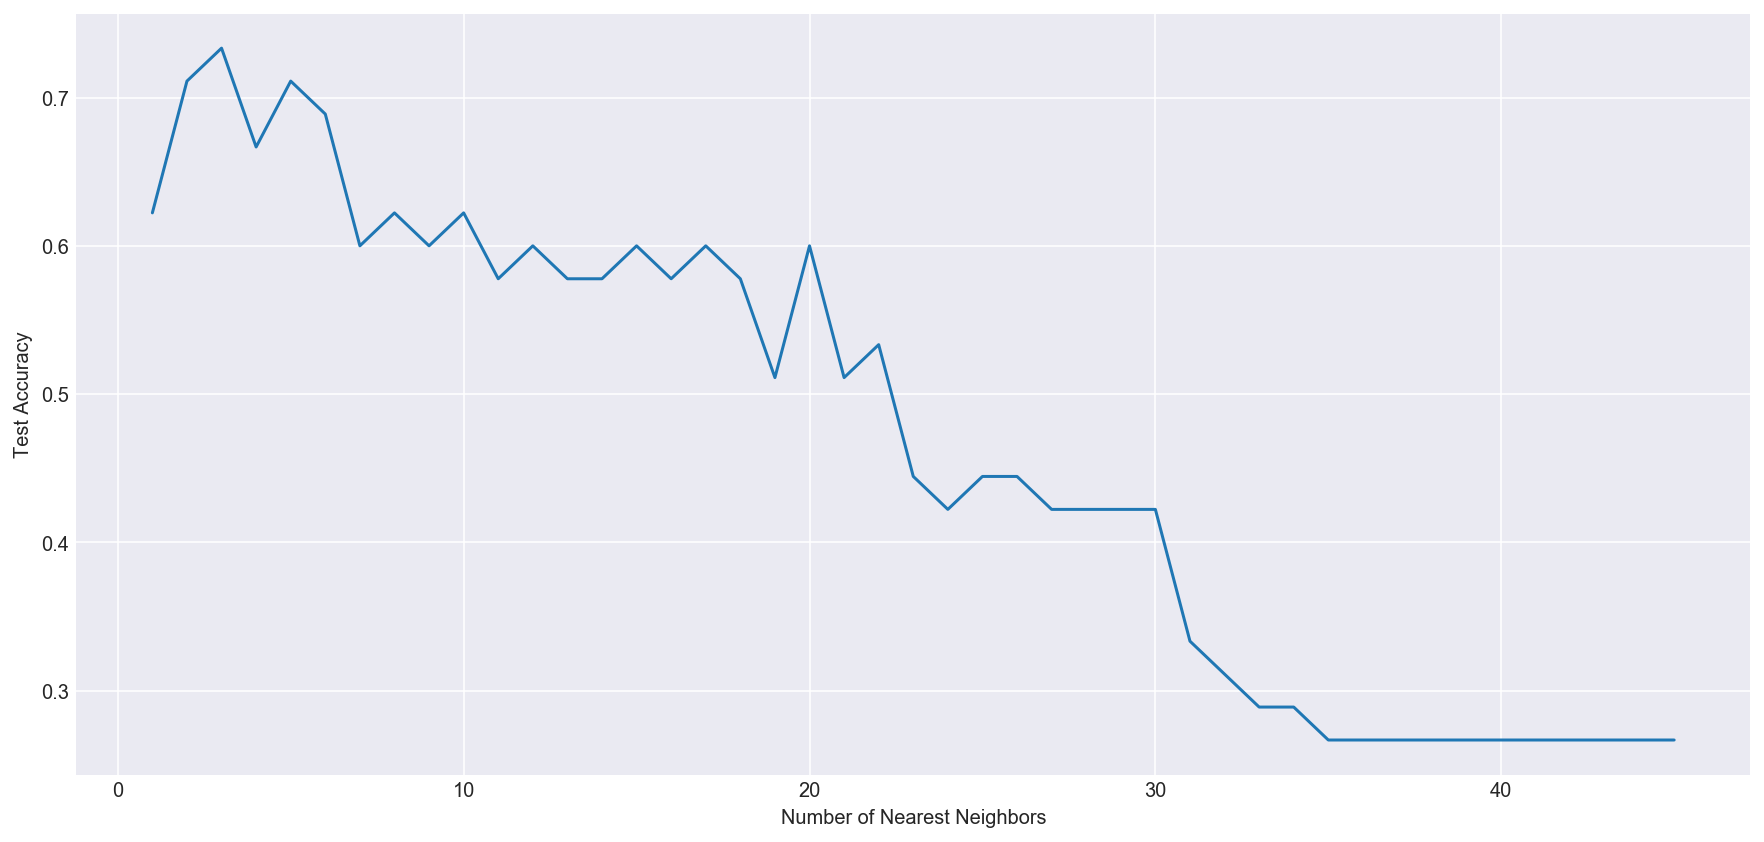

In [93]:
x = list(range(1, len(X_train) + 1))
y = test_accuracy

sns.set_style('darkgrid')
fig = plt.figure(figsize=(15, 7))
ax = fig.gca()
ax.plot(x, y)
plt.ylabel('Test Accuracy')
plt.xlabel('Number of Nearest Neighbors')

### 11) Fit KNN across different values of K and plot the mean cross-validated accuracy with five folds.

In [97]:
# A:
mean_accuracy = []
for x in [3, 5, 10, 15, 25, 35]:
    new = KNeighborsClassifier(n_neighbors=x, weights='uniform')
    scores = cross_val_score(new, X_train, y_train, cv=5)
    mean_accuracy.append(np.mean(scores))

Text(0.5,0,'Number of Nearest Neighbors')

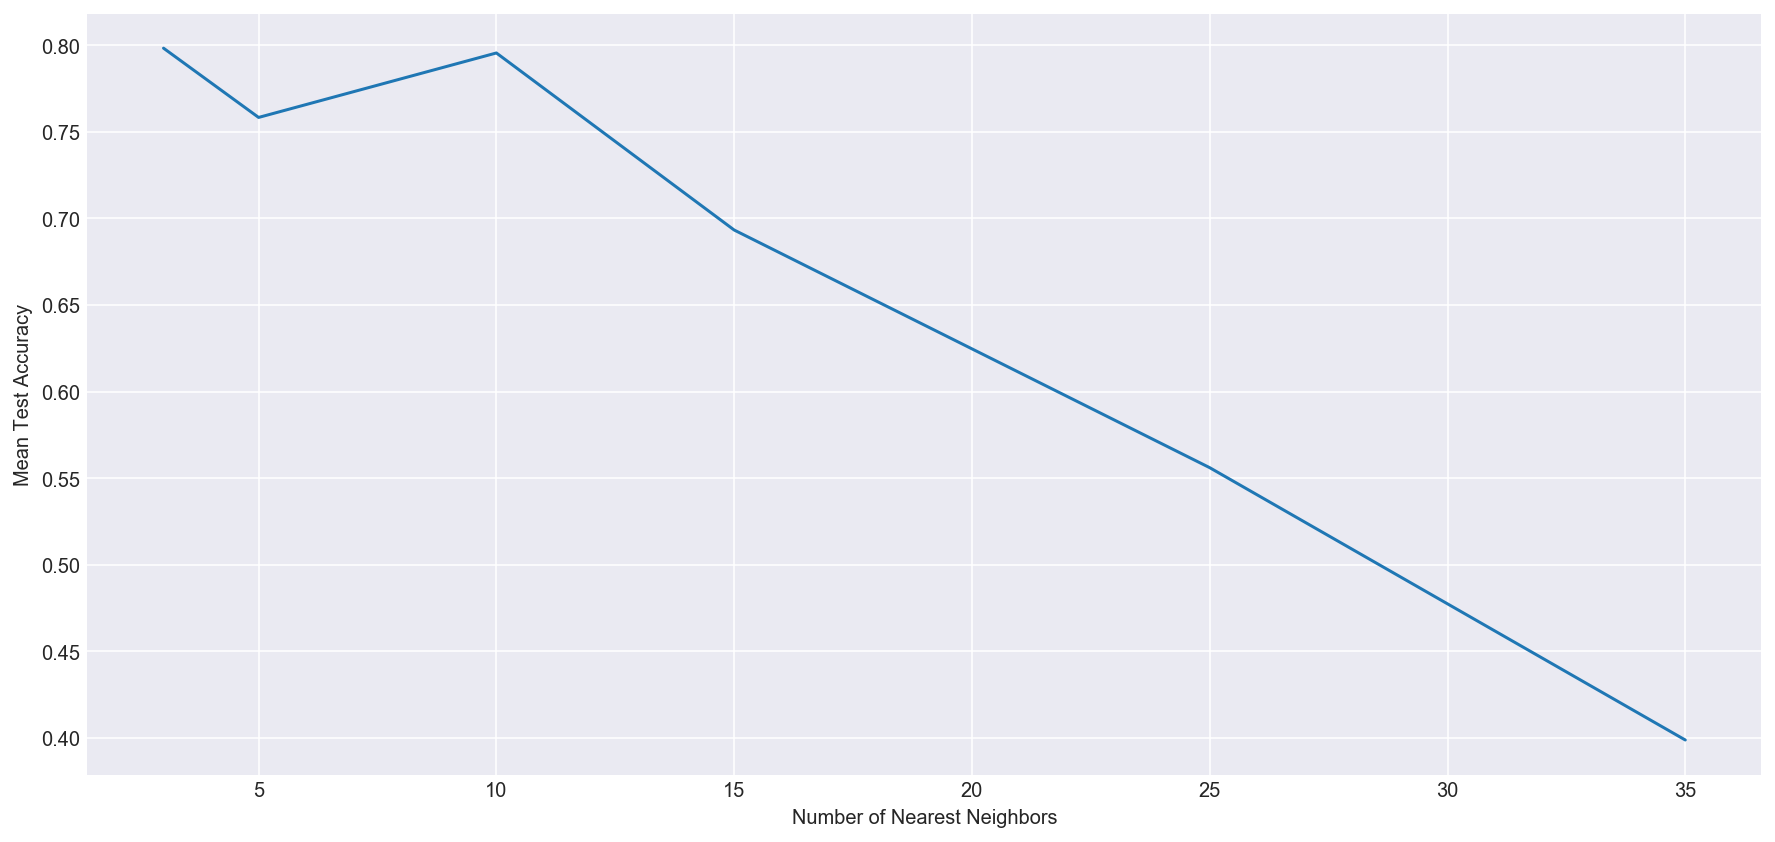

In [98]:
new_x = [3, 5, 10, 15, 25, 35]
fig = plt.figure(figsize=(15, 7))
ax = fig.gca()
ax.plot(new_x, mean_accuracy)
plt.ylabel('Mean Test Accuracy')
plt.xlabel('Number of Nearest Neighbors')

### 12) Standardize the predictor matrix and cross-validate across the different K values.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [102]:
new_y = nhl['Rank'].values

Text(0.5,0,'Number of Nearest Neighbors')

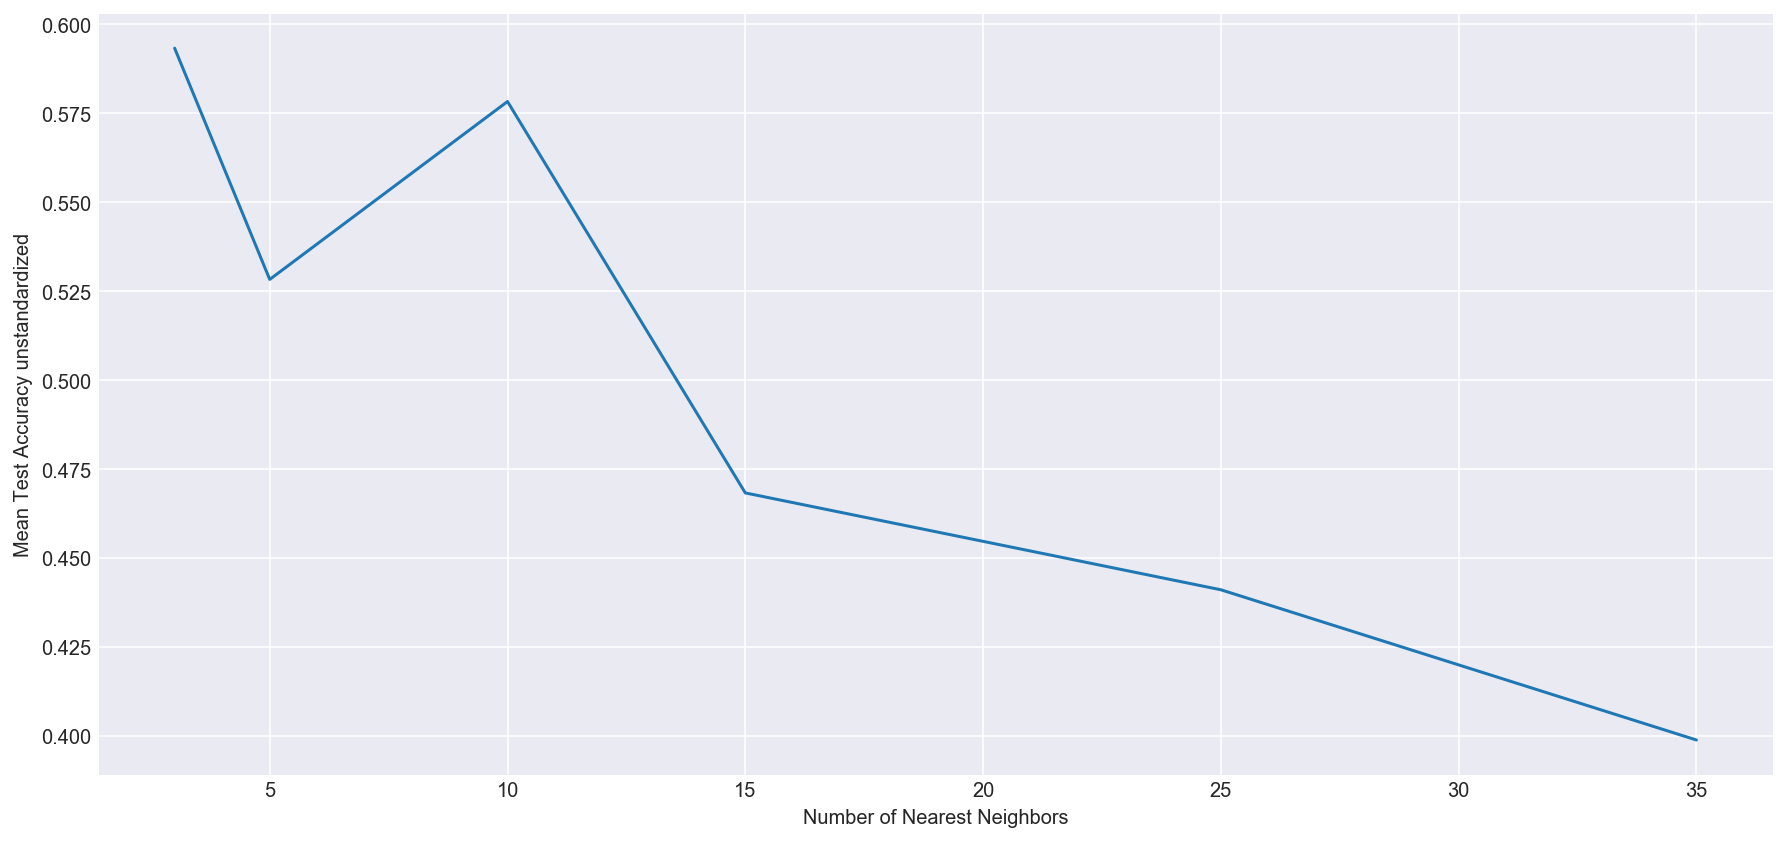

In [104]:
# A: higher variance given larger number ranges. 
X_train_unstd, X_test_unstd, y_train_unstd, y_test_unstd = train_test_split(X, new_y, test_size=0.5, random_state=48)
unstd_scores = []

for x in [3, 5, 10, 15, 25, 35]:
    new1 = KNeighborsClassifier(n_neighbors=x, weights='uniform')
    mod = cross_val_score(new1, X_train_unstd, y_train_unstd, cv=5)
    unstd_scores.append(np.mean(mod))

fig = plt.figure(figsize=(15, 7))
ax = plt.gca()
ax.plot(new_x, unstd_scores)
plt.ylabel('Mean Test Accuracy unstandardized')
plt.xlabel('Number of Nearest Neighbors')